# **Descripción del proyecto**

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos. Más adelante, encontrarás en las instrucciones del proyecto cuáles son exactamente los aspectos del comportamiento de los clientes que debes analizar. Determinar qué plan, en promedio, aporta más ingresos es una cuestión que se abordará mediante pruebas estadísticas. Más adelante encontrarás más información al respecto en la sección de instrucciones del proyecto.

# **Descripción de las tarifas**

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación puedes ver una descripción de las tarifas:

**Surf**

- Pago mensual: $20.
- 500 minutos al mes, 50 SMS y 15 GB de datos.
- Si se exceden los límites del paquete:

1 minuto: 3 centavos.

1 SMS: 3 centavos.

1 GB de datos: $10.

**Ultimate**

- Pago mensual: $70.
- 3000 minutos al mes, 1000 SMS y 30 GB de datos.
- Si se exceden los límites del paquete:

1 minuto: 1 centavo.

1 SMS: 1 centavo.

1 GB de datos: $7.

# **Diccionario de datos**



En este proyecto, trabajarás con cinco tablas diferentes.

La tabla users (datos sobre los usuarios):

- user_id: identificador único del usuario.
- first_name: nombre del usuario.
- last_name: apellido del usuario.
- age: edad del usuario (en años).
- reg_date: fecha de suscripción (dd, mm, aa).
- churn_date: la fecha en la que el usuario dejó de usar el servicio (si el - valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).
- city: ciudad de residencia del usuario.
- plan: nombre de la tarifa.

La tabla calls (datos sobre las llamadas):

- id: identificador único de la llamada.
- call_date: fecha de la llamada.
- duration: duración de la llamada (en minutos).
- user_id: el identificador del usuario que realiza la llamada.

La tabla messages (datos sobre los SMS):

- id: identificador único del SMS.
- message_date: fecha del SMS.
- user_id: el identificador del usuario que manda el SMS.

La tabla internet (datos sobre las sesiones web):

- id: identificador único de la sesión.
- mb_used: el volumen de datos gastados durante la sesión (en megabytes).
- session_date: fecha de la sesión web.
- user_id: identificador del usuario.

La tabla plans (datos sobre las tarifas):

- plan_name: nombre de la tarifa.
- usd_monthly_fee: pago mensual en dólares estadounidenses.
- minutes_included: minutos incluidos al mes.
- messages_included: SMS incluidos al mes.
- mb_per_month_included: datos incluidos al mes (en megabytes).
- usd_per_minute: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
- usd_per_message: precio por SMS tras exceder los límites del paquete.
- usd_per_gb: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).

# **Instrucciones para completar el proyecto**

- Paso 1. Abre el archivo de datos y estudia la información general

A continuación encontrarás las rutas de los archivos que hay que leer, junto con los enlaces para descargarlos si es necesario:

/datasets/megaline_calls.csv Descargar conjunto de datos

/datasets/megaline_internet.csv Descargar conjunto de datos

/datasets/megaline_messages.csv Descargar conjunto de datos

/datasets/megaline_plans.csv Descargar conjunto de datos

/datasets/megaline_users.csv Descargar conjunto de datos

- Paso 2. Prepara los datos

- Convierte los datos en los tipos necesarios.
- Encuentra y elimina errores en los datos. Asegúrate de explicar qué errores encontraste y cómo los eliminaste.

Para cada usuario, busca:

- El número de llamadas realizadas y minutos utilizados al mes.
- La cantidad de los SMS enviados por mes.
- El volumen de datos por mes.
- Los ingresos mensuales por cada usuario. Para ello, necesitas:

Restar el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos.

Multiplicar el resultado por el valor de la tarifa de llamadas.
Añadir la cuota mensual en función del plan de llamadas.

- Paso 3. Analiza los datos

- Encuentra los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes.
- Calcula la media, la varianza y la desviación estándar.
- Traza histogramas. Describe las distribuciones.

- Paso 4. Prueba las hipótesis

El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.

El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats
from scipy import stats as st
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
calls_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYST/SPRINT 5 (Análisis estadístico de los datos)/megaline_calls.csv')
internet_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYST/SPRINT 5 (Análisis estadístico de los datos)/megaline_internet.csv')
messages_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYST/SPRINT 5 (Análisis estadístico de los datos)/megaline_messages.csv')
plans_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYST/SPRINT 5 (Análisis estadístico de los datos)/megaline_plans.csv')
users_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYST/SPRINT 5 (Análisis estadístico de los datos)/megaline_users.csv')

In [4]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [12]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [13]:
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [14]:
calls_df['duration'] = np.ceil(calls_df['duration'])

In [15]:
calls_df = calls_df[calls_df['duration'] > 0]

In [16]:
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


Acá redondeamos la duración de todas las llamadas al número siguiente al decimal, es decir, si tenemos llamadas así sea de 0,1, esta queda en 1 y eliminamos las llamadas equivalentes a 0.

In [17]:

calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

calls_df['month'] = calls_df['call_date'].dt.month
messages_df['month'] = messages_df['message_date'].dt.month
internet_df['month'] = internet_df['session_date'].dt.month



In [18]:

users_df['churn_date'] = users_df['churn_date'].fillna(0)


In [19]:
print(users_df.isna().sum())

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64


Pasé todas las fechas al formato correspondiente, sin embargo. En cuanto al churn date, significa que solo 34 usuarios de 500 abandonaron el servicio, por lo que relleno con cero los valores ausentes.

In [20]:
calls_grouped = (calls_df.groupby(['user_id', 'month']).agg(
    num_calls = ('id', 'count'),
         total_minutes = ('duration', 'sum'))
    .reset_index()
)
calls_grouped = calls_grouped.sort_values(
    ['user_id','month']).reset_index(drop=True)

calls_grouped.head()

,user_id,month,num_calls,total_minutes
0,1000,12,16,124.0
1,1001,8,22,182.0
2,1001,9,38,315.0
3,1001,10,47,393.0
4,1001,11,49,426.0


In [21]:
messages_grouped = messages_df.groupby(['user_id', 'month']).agg(
    messages_sent=('id', 'count')
).reset_index()
messages_grouped.head()

,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


Ahora tenemos la cantidad de SMS enviados por cada usuario por mes.

In [22]:
internet_df_grouped = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_df_grouped['gb_used'] = np.ceil(internet_df_grouped['mb_used'] / 1024)
internet_df_grouped.head()

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


Cambiamos la fecha completa solo al mes que es el que se redondea hacia arriba con base en los megabytes utlizados, que, si se usaban mas de 1024 que es el equivalente a 1 gb, se redondea al gb correspondiente.

In [23]:
monthly = calls_grouped.merge(messages_grouped, on=['user_id', 'month'], how='outer')
monthly = monthly.merge(internet_df_grouped, on=['user_id', 'month'], how='outer')
monthly = monthly.merge(users_df[['user_id', 'plan']], on='user_id', how='left')
monthly = monthly.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

monthly.fillna(0, inplace=True)

monthly.head()

,user_id,month,num_calls,total_minutes,messages_sent,mb_used,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,22.0,182.0,30.0,6919.15,7.0,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,38.0,315.0,44.0,13314.82,14.0,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,47.0,393.0,53.0,22330.49,22.0,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,49.0,426.0,36.0,18504.30,19.0,surf,50,15360,500,20,10,0.03,0.03,surf


Acá se unieron los dataframes agrupados, con los de planesa partir de merge, para tener todos los datos en un solo data frame y empezar a operar a partir de un data frame con toda la información integrada. Al ser estos distintos df, se aplica outer para inlcuir toda la informacion y utilizamos el método fillna, para rellenar esos valores ausentes que pueda tener cada df con 0.

In [24]:
monthly['extra_min'] = (monthly['total_minutes'] - monthly['minutes_included']).clip(lower=0)
monthly['extra_sms'] = (monthly['messages_sent'] - monthly['messages_included']).clip(lower=0)
monthly['extra_gb'] = (monthly['gb_used'] - (monthly['mb_per_month_included'] / 1024)).clip(lower=0)


monthly['cost_extra'] = (
    monthly['extra_min'] * monthly['usd_per_minute'] +
    monthly['extra_sms'] * monthly['usd_per_message'] +
    monthly['extra_gb'] * monthly['usd_per_gb']
)

monthly['monthly_revenue'] = monthly['usd_monthly_pay'] + monthly['cost_extra']

monthly.head()

,user_id,month,num_calls,total_minutes,messages_sent,mb_used,gb_used,plan,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,extra_min,extra_sms,extra_gb,cost_extra,monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,1000,30720,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,0.00,70.00
1,1001,8,22.0,182.0,30.0,6919.15,7.0,surf,50,15360,...,20,10,0.03,0.03,surf,0.0,0.0,0.0,0.00,20.00
2,1001,9,38.0,315.0,44.0,13314.82,14.0,surf,50,15360,...,20,10,0.03,0.03,surf,0.0,0.0,0.0,0.00,20.00
3,1001,10,47.0,393.0,53.0,22330.49,22.0,surf,50,15360,...,20,10,0.03,0.03,surf,0.0,3.0,7.0,70.09,90.09
4,1001,11,49.0,426.0,36.0,18504.30,19.0,surf,50,15360,...,20,10,0.03,0.03,surf,0.0,0.0,4.0,40.00,60.00


Después de unir todo en un dataframe llamado monthly, se añadieron las columnas de minutos, mensajes y gb extra con el fin de poder calcular el costo extra por usuario del acumulado de servicios y la factura final mensual de la suma de todos los servicios acumulados por usuario.

In [25]:
use_by_plan = (
    monthly.groupby(['plan', 'month'])
    .agg({
        'total_minutes': 'sum',
        'messages_sent': 'sum',
        'gb_used': 'sum'
    })
    .reset_index()
)

Se crea una nueva variable que agrupe el plan y el mes y se agrega el diccionario total minutes, messages sent y gb used y se suman con el fin de encontrar el total por factor.

In [26]:
use_by_plan.head()

,plan,month,total_minutes,messages_sent,gb_used
0,surf,1,406.0,21.0,10.0
1,surf,2,2673.0,108.0,110.0
2,surf,3,7590.0,351.0,312.0
3,surf,4,17577.0,870.0,611.0
4,surf,5,30768.0,1849.0,1087.0


In [27]:
avg_by_plan = (
    monthly.groupby(['plan', 'month'])
    .agg({
        'total_minutes': 'mean',
        'messages_sent': 'mean',
        'gb_used': 'mean'
    })
    .reset_index()
)


In [28]:
avg_by_plan.head()

,plan,month,total_minutes,messages_sent,gb_used
0,surf,1,203.000000,10.500000,5.000000
1,surf,2,297.000000,12.000000,12.222222
2,surf,3,330.000000,15.260870,13.565217
3,surf,4,351.540000,17.400000,12.220000
4,surf,5,399.584416,24.012987,14.116883


Acá sacamos el promedio

In [29]:
std_dev_by_plan = (
    avg_by_plan.groupby('plan')
    .agg({
        'total_minutes': 'std',
        'messages_sent': 'std',
        'gb_used': 'std'
    })
    .reset_index()
)

print("Desviación estándar por plan:")
display(std_dev_by_plan)

Desviación estándar por plan:


,plan,total_minutes,messages_sent,gb_used
0,surf,76.535567,9.049246,3.628348
1,ultimate,77.266064,9.346334,2.991152


Desviacion estandard

In [30]:
variance_by_plan = (
    avg_by_plan.groupby('plan')
    .agg({
        'total_minutes': 'var',
        'messages_sent': 'var',
        'gb_used': 'var'
    })
    .reset_index()
)

variance_by_plan.head()

,plan,total_minutes,messages_sent,gb_used
0,surf,5857.693038,81.888846,13.164907
1,ultimate,5970.044622,87.353963,8.946993


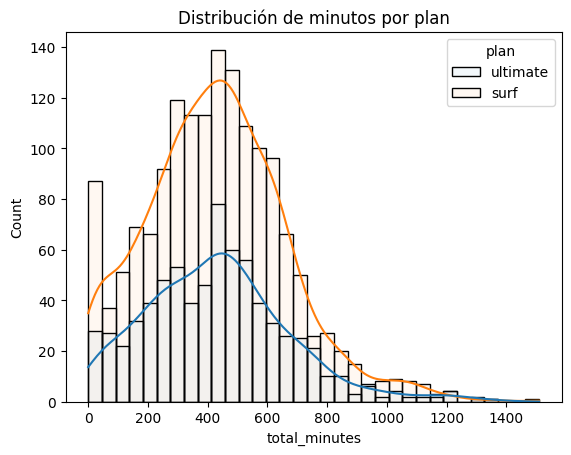

In [31]:
sns.histplot(data=monthly, x='total_minutes', hue='plan', kde=True, alpha=0.05)
plt.title('Distribución de minutos por plan')
plt.show()

El gráfico evidencia que la distribución de minutos por plan está levemente sesgada hacia la izquierda, aunque en ambos casos se asemeja bastante a una distribución normal. Tanto para Surf como para Ultimate, las medianas se encuentran muy cerca entre sí, lo que sugiere que, en promedio, los usuarios de ambos planes utilizan un número similar de minutos mensualmente. Sin embargo, los usuarios de Ultimate tienden a mostrar una mayor dispersión, posiblemente porque disponen de más minutos incluidos y no tienen tanto incentivo para controlar su consumo.

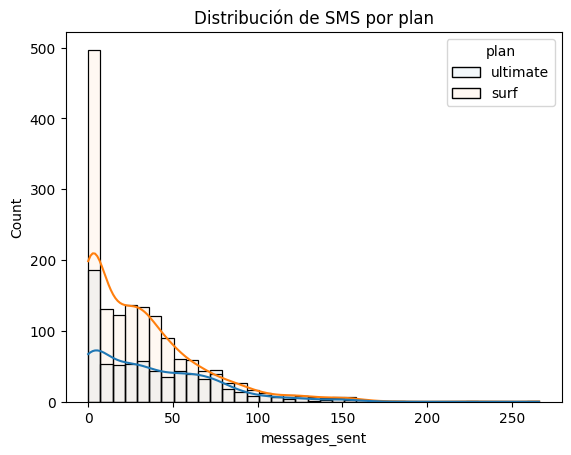

In [32]:
sns.histplot(data=monthly, x='messages_sent', hue='plan', kde=True, alpha=0.05)
plt.title('Distribución de SMS por plan')
plt.show()

La distribución de los mensajes enviados está fuertemente sesgada hacia la izquierda para ambos planes, concentrando la mayoría de los valores en cero o muy pocos mensajes. Esto indica que una gran proporción de los usuarios prácticamente no utiliza el servicio de SMS. En este caso, las diferencias entre planes son mínimas, ya que el envío de mensajes no parece ser un factor decisivo entre Surf y Ultimate.

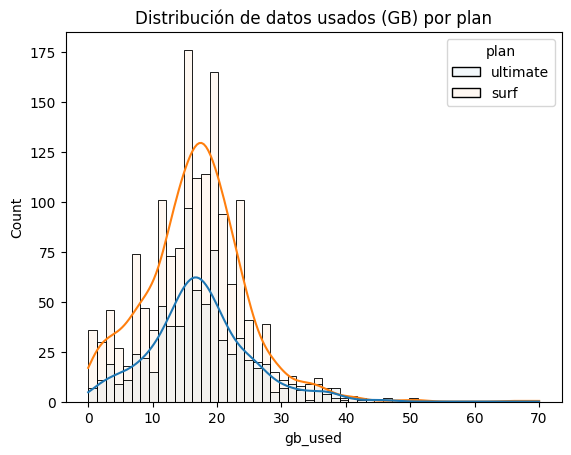

In [33]:
sns.histplot(data=monthly, x='gb_used', hue='plan', kde=True, alpha=0.05)
plt.title('Distribución de datos usados (GB) por plan')
plt.show()

La distribucion del consumo de datos presenta una forma más extendida y con sesgo postivo, especialmente en el plan Ultimate. Esto significa que la mayoria de los usuarios consume una cantidad moderada de datos, pero hay un grupo más pequeño que consume mucho más, generando una cola larga. En cambio, los usuarios del plan Surf tienden a tener una concentración mas marcada en valores bajos, lo que sugiere que sus límites de datos podrían restringir el uso o que este grupo representa a usuarios menos intensivos en navegación.

**Prueba de hipótesis 1**

El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.

**Hipótesis nula:**

El ingreso promedio de los usuarios de las tarifas Ultimate y Surf es igual

**Hipótesis alt:**

El ingreso promedio de los usuaros de las tarifas Ultimate y Surf es diferente.

Voy a usae una prueba t para muestras independientes (scipy.stats.ttest_ind),
porque se hace una comparación de las medias de dos grupos distintos correspondiente a cada plan.

Y no se puede asumir que las varianzas sean iguales.

Se hace una prueba bilateral para saber si hay una diferencia.

In [39]:
surf_revenue = monthly[monthly['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = monthly[monthly['plan'] == 'ultimate']['monthly_revenue']

alpha = 0.05

p_value = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('Valor p:', p_value.pvalue)

if p_value.pvalue < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencia significativa.")

Valor p: 3.1703905481135738e-15
Rechazamos la hipótesis nula: los ingresos promedio son diferentes.


**Prueba hipótesis 2**

El ingreso promedio de los usuarios en el área de Nueva York–Nueva Jersey es diferente al de los usuarios de otras regiones.

**Hipótesis nula:**

El ingreso promedio de los usuarios de Nueva York–Nueva Jersey es igual al de los usuarios de otras regiones.

**Hipótesis alt:**

El ingreso promedio de los usuarios de Nueva York–Nueva Jersey es diferente.

Nuevamente, voy a usar una prueba t para muestras independientes (ttest_ind),

In [35]:
monthly_with_city = monthly.merge(users_df[['user_id', 'city']], on='user_id', how='left')

ny_nj_revenue = monthly_with_city[
    monthly_with_city['city'].str.contains('NY|New York|New Jersey',
                                           case=False,
                                           na=False)]['monthly_revenue']

other_revenue = monthly_with_city[
    ~monthly_with_city['city'].str.contains('NY|New York|New Jersey',
                                            case=False, na=False)]['monthly_revenue']

alpha = 0.05

results_region = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print('Valor p:', results_region.pvalue)

if results_region.pvalue < alpha:
    print("Rechazamos la hipotesis nula: los ingresos promedio son diferentes por región.")
else:
    print("No podemos rechazar la hipotesis: los ingresos promedio no difieren significativamente.")

Valor p: 0.6097894513379821
No podemos rechazar la hipotesis: los ingresos promedio no difieren significativamente.
